In [ ]:
# https://arxiv.org/abs/1912.11166

In [35]:
%matplotlib inline
# 2020 FinanceData.KR
import pandas as pd
from datetime import datetime, timedelta

import plotly.offline as pyo
from sklearn.preprocessing import minmax_scale

In [14]:
def get_data(code):
    url = 'https://query1.finance.yahoo.com/v7/finance/download/'+code+'?period1=-1325635200&period2=9999999999&interval=1d&events=history'
    return pd.read_csv(url, parse_dates=True, index_col='Date')

In [15]:
bt = get_data('BTC-USD')
bt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [20]:
gc = get_data('GC%3DF')
gc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0


In [32]:
us3 = get_data('^IRX')
us3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1960-01-04,4.52,4.52,4.52,4.52,4.52,0.0
1960-01-05,4.55,4.55,4.55,4.55,4.55,0.0
1960-01-06,4.68,4.68,4.68,4.68,4.68,0.0
1960-01-07,4.63,4.63,4.63,4.63,4.63,0.0
1960-01-08,4.59,4.59,4.59,4.59,4.59,0.0


In [33]:
us5 = get_data('^FVX')
us5.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,3.88,3.88,3.88,3.88,3.88,0.0
1962-01-03,3.87,3.87,3.87,3.87,3.87,0.0
1962-01-04,3.86,3.86,3.86,3.86,3.86,0.0
1962-01-05,3.89,3.89,3.89,3.89,3.89,0.0
1962-01-07,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
us10 = get_data('^TNX')
us10.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,4.06,4.06,4.06,4.06,4.06,0.0
1962-01-03,4.03,4.03,4.03,4.03,4.03,0.0
1962-01-04,3.99,3.99,3.99,3.99,3.99,0.0
1962-01-05,4.02,4.02,4.02,4.02,4.02,0.0
1962-01-07,NaN,NaN,NaN,NaN,NaN,NaN


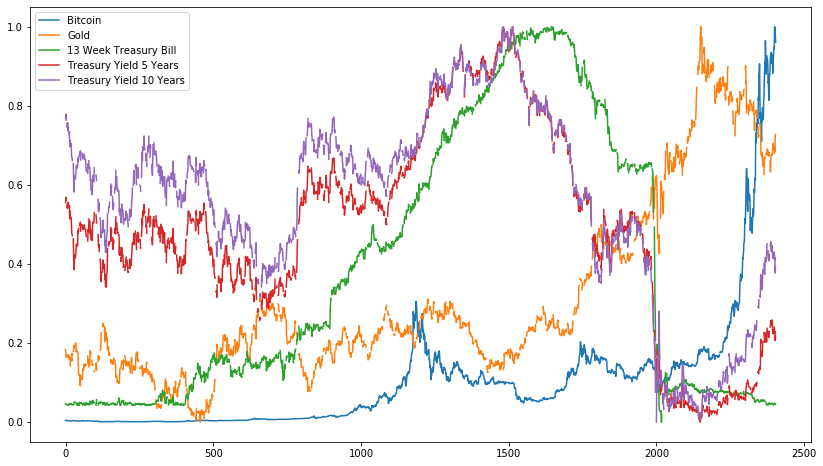

In [43]:
df_plot = pd.DataFrame()
df_plot['Bitcoin'] = bt['Adj Close']
df_plot['Gold'] = gc['Adj Close']
df_plot['13 Week Treasury Bill'] = us3['Adj Close']
df_plot['Treasury Yield 5 Years'] = us5['Adj Close']
df_plot['Treasury Yield 10 Years'] = us10['Adj Close']
df_plot = pd.DataFrame(minmax_scale(df_plot), columns=df_plot.columns)
p = df_plot.plot(figsize=(14,8))
